In [1]:
%load_ext autoreload
%autoreload 2
import sent2vec
import numpy as np
import random
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity as cos
from scipy.stats import pearsonr, spearmanr
from evaluation_experiments import sort_length_embedding_mr,nestedCV,conduct_lr,STS_eval,sort_length_embedding_sts
from matplotlib import pyplot as plt

In [2]:
# load sentence embedding model
# model_path = '../models/'
path  = '/longterm/kaijil/data/10715/'
model_path = path + 'models/'
data_path =  path + 'data/'

# model_wi_1 = sent2vec.Sent2vecModel()
# model_wi_1.load_model(model_path + 'wiki_unigrams.bin')
model_wi_2 = sent2vec.Sent2vecModel()
model_wi_2.load_model(model_path + 'wiki_bigrams.bin')
# model_tw_1 = sent2vec.Sent2vecModel()
# model_tw_1.load_model(model_path + 'twitter_unigrams.bin')
model_tw_2 = sent2vec.Sent2vecModel()
model_tw_2.load_model(model_path + 'twitter_bigrams.bin')
# model_tb_1 = sent2vec.Sent2vecModel()
# model_tb_1.load_model(model_path + 'torontobooks_unigrams.bin')
model_tb_2 = sent2vec.Sent2vecModel()
model_tb_2.load_model(model_path + 'torontobooks_bigrams.bin')

In [8]:
models = [model_wi_2,model_tw_2,model_tb_2]
# model_tw_2,model_tb_1,model_tb_2]

# Length Experiements

## STS 2014

In [10]:
all_pearson = []
all_spearman = []
for model in models:
    pearson_news, spearman_news = STS_eval('deft-news', model,data_path)
    all_pearson.append(np.round(pearson_news,3))
    all_spearman.append(np.round(spearman_news,3))
    print('spearman correlation with gs:',  spearman_news)
    print('pearson correlation with gs:', pearson_news)
average = (np.array(all_pearson) + np.array(all_spearman)) / 2
print(average.shape)

spearman correlation with gs: [0.7071182762866578, 0.7080307450168625, 0.5898901283044059, 0.32464410074695843]
pearson correlation with gs: [0.7009455738808448, 0.7447547646913906, 0.7375991803183546, 0.39181501285943693]
spearman correlation with gs: [0.6790752718593108, 0.7395508026227982, 0.6040739737411887, 0.30683668387766183]
pearson correlation with gs: [0.6853452708273724, 0.7473780468429992, 0.745234092192687, 0.3882077875634481]
spearman correlation with gs: [0.5815245462080884, 0.6456579004898675, 0.592213911328052, 0.26053429768005704]
pearson correlation with gs: [0.5719643700954586, 0.6746323432417386, 0.7171830777703896, 0.33934098982531]
(3, 4)


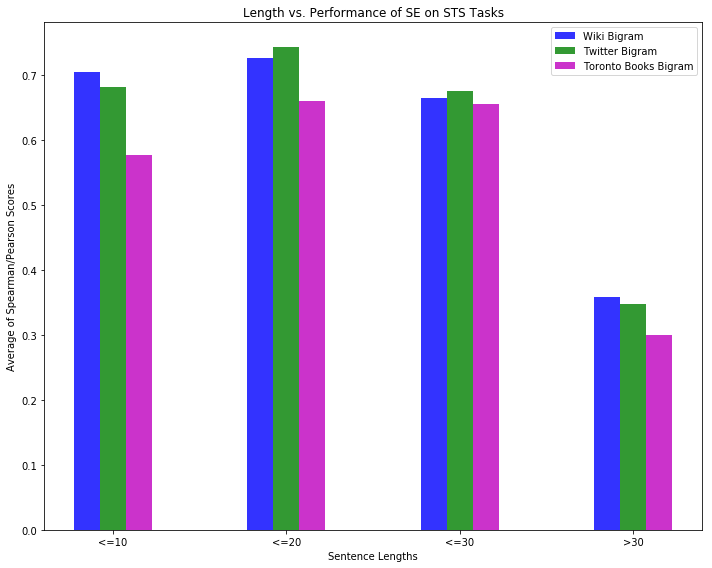

In [28]:
 
# data to plot
n_groups = 4
m1 = average[0,:]
m2 = average[1,:]
m3 = average[2,:]
 
# create plot
fig, ax = plt.subplots(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, m1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Wiki Bigram')
 
rects2 = plt.bar(index + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Twitter Bigram')
rects3 = plt.bar(index + bar_width*2, m3, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Toronto Books Bigram')
 
plt.xlabel('Sentence Lengths')
plt.ylabel('Average of Spearman/Pearson Scores')
plt.title('Length vs. Performance of SE on STS Tasks')
plt.xticks(index + bar_width, ('<=10', '<=20', '<=30', '>30'))
plt.legend()
 
plt.tight_layout()
plt.show()

## Movie Review

In [17]:
# load movie reviews and preprocessing
mr_file_neg = open(data_path + 'rt-polaritydata/rt-polarity.neg', encoding="latin-1")
mr_sent_neg = mr_file_neg.readlines()
mr_file_neg.close()
mr_file_pos = open(data_path + 'rt-polaritydata/rt-polarity.pos', encoding="latin-1")
mr_sent_pos = mr_file_pos.readlines()
mr_file_pos.close()
mr_sent_neg = np.array(mr_sent_neg)
mr_sent_pos = np.array(mr_sent_pos)
mr_y_neg = np.zeros_like(mr_sent_neg)
for i in range(len(mr_y_neg)):
    mr_y_neg[i] = 0
mr_y_pos = np.ones_like(mr_sent_pos)
mr_sent = np.concatenate((mr_sent_pos, mr_sent_neg))
mr_y = np.concatenate((mr_y_pos, mr_y_neg))

random.seed(2)
random.shuffle(mr_sent)
random.seed(2)
random.shuffle(mr_y)

NameError: name 'calculate_accuracy' is not defined

In [19]:
def calculate_accuracy(sorted_mr_x, sorted_mr_y, lengths):
    len_sep = [10, 20, 30, 55]
    indexes = []
    for i in range(len(len_sep)):
        indexes.append([])

    for i in range(len(lengths)):
        for pin in range(len(len_sep)):
            if lengths[i] <= len_sep[pin]: 
                indexes[pin].append(i)
                break

    mr_xs = []
    mr_ys = []

    for i in range(len(indexes)):
        print(len(indexes[i]))

    for i in range(len(indexes)):
        temp = np.random.choice(indexes[i], 900, replace=False)
        mr_xs.append([sorted_mr_x[i] for i in temp])
        mr_ys.append([sorted_mr_y[i] for i in temp])

    accuracies = []
    for i in range(len(mr_xs)):
        accuracies.append(conduct_lr(mr_xs[i], mr_ys[i]))


    return accuracies

In [20]:
accuracies_all = []
for model in models:
    sorted_mr_x, sorted_mr_y, lengths = sort_length_embedding_mr(mr_sent, mr_y, model)
    accuracies_all.append(calculate_accuracy(sorted_mr_x, sorted_mr_y, lengths))

2048
4413
3228
973
2048
4413
3228
973
2048
4413
3228
973


In [24]:
accuracies_all = np.array(accuracies_all)
print(accuracies_all.shape)

(3, 4)


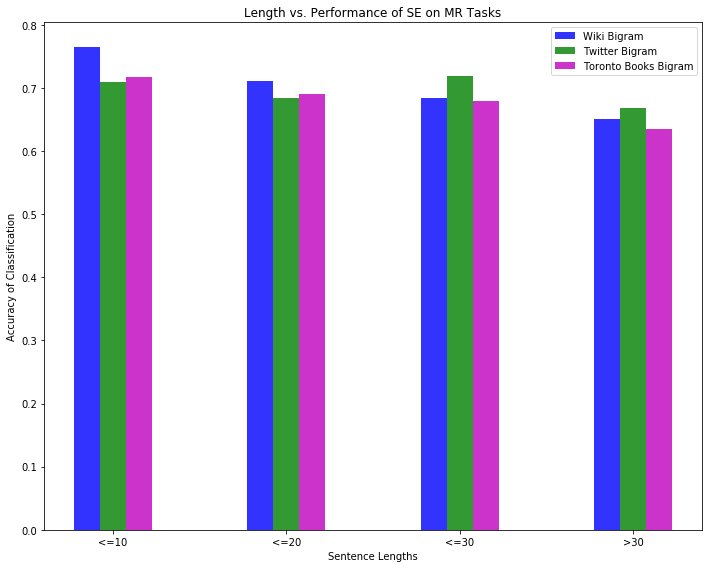

In [27]:
 
# data to plot
n_groups = 4
m1 = accuracies_all[0,:]
m2 = accuracies_all[1,:]
m3 = accuracies_all[2,:]
 
# create plot
fig, ax = plt.subplots(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, m1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Wiki Bigram')
 
rects2 = plt.bar(index + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Twitter Bigram')
rects3 = plt.bar(index + bar_width*2, m3, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Toronto Books Bigram')
 
plt.xlabel('Sentence Lengths')
plt.ylabel('Accuracy of Classification')
plt.title('Length vs. Performance of SE on MR Tasks')
plt.xticks(index + bar_width, ('<=10', '<=20', '<=30', '>30'))
plt.legend()
 
plt.tight_layout()
plt.show()